In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys

from numpy.random import default_rng
from scipy.optimize import minimize
from scipy.interpolate import PchipInterpolator, griddata
from scipy.special import erf
# from scipy.stats import truncnorm
from tqdm.notebook import tqdm

from superrad import ultralight_boson as ub

orig_path = "/Users/sebhoof/Research/BHSR/"
sys.path.append("external/bhsr_exclusions_stott/")
from BH_functions import stellar_functions

from py.bhsr import *
from py.self_interactions import *
from py.cfm import *
#from py.constants import *
from py.kerr_bh import *
from py.plotting import *
from py.stats import *

rng = default_rng()
set_style(gs=9, lts=9, lfs=8, lbls=9, tls=9)

!mkdir -p figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BHSR Rates

In [4]:
# states0 = [(ell+1, ell, ell) for ell in range(1,5)]
bc0 = ub.UltralightBoson(spin=0, model="relativistic")
astar0 = 0.99
mbh0 = 10.0 # Msol

mu_max = 7e-12
muvals = np.linspace(0, mu_max, 250)
alphvals = alpha(muvals, mbh0)
muvals_small = np.linspace(1e-13, mu_max, 100)
alphvals_small = alpha(muvals_small, mbh0)

roots = [find_cf_root(mbh0, astar0, mu, 2, 1, 1) for mu in tqdm(muvals)]
cfm_bhsr_rates = np.array([z.imag for z in roots])*rg(mbh0)
cfm_omegas = np.array([z.real for z in roots])
superrad_bhsr_rates = [GammaSR_nlm_superrad(mu, mbh0, astar0, m=1, bc=bc0)*rg(mbh0) for mu in muvals]
nr_bhsr_rates = GammaSR_nlm_nr(muvals, mbh0, astar0, 2, 1, 1)*rg(mbh0)
hovals = [omega_nlm_bxzh(mu, mbh0, astar0, 2, 1, 1) for mu in muvals]
ho_bhsr_rates = np.array([z[-1]*rg(mbh0) for z in hovals])
ho_omegas = np.array([z[0] for z in hovals])
hf_omegas = np.array([omegaHyperfine(mu, mbh0, astar0, 2, 1, 1) for mu in muvals])
ref_nr_mu0, ref_nr_bhsr_rates0 = np.genfromtxt("data/1004_3558/1004_3558_fig5_ell_1_nr", unpack=True)
ref_nr_mu1, ref_nr_bhsr_rates1 = np.genfromtxt("data/1004_3558/1004_3558_fig6_a09.dat", unpack=True)

  0%|          | 0/250 [00:00<?, ?it/s]

/Users/sebhoof/Software/bhsr/py/bhsr.py:206: RuntimeWarning: invalid value encountered in scalar divide
  delta1 = 0.5*(q/eps - eps - p*2j)*kappab_term*gam_terms


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
E VariableMe

/Users/sebhoof/Software/bhsr/py/bhsr.py:206: RuntimeWarning: invalid value encountered in scalar divide
  delta1 = 0.5*(q/eps - eps - p*2j)*kappab_term*gam_terms


In [5]:
"""
Checks for later
plt.plot(alphvals, ho_bhsr_rates/cfm_bhsr_rates - 1)
plt.plot(alphvals, ho_bhsr_rates/np.array(superrad_bhsr_rates) - 1)
plt.ylim(-0.6,0.3)
plt.show()

plt.plot(alphvals, ho_omegas/cfm_omegas - 1)
plt.plot(alphvals, hf_omegas/cfm_omegas - 1)
plt.show()
""";

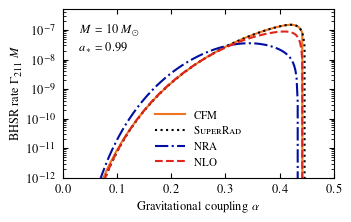

In [21]:
fig, ax = plt.subplots(figsize=(mnras_width,mnras_width/golden_ratio))

p3 = ax.plot(alphvals, cfm_bhsr_rates, c=Overground, ls='-', label=r"CFM") # 0705.2880
p5 = ax.plot(alphvals, superrad_bhsr_rates, c=Northern, ls=':', label=r"\textsc{SuperRad}")
p1 = ax.plot(alphvals, nr_bhsr_rates, c=Picadilly, ls='-.', label=r"NRA") # 1004.3558
p2 = ax.plot(alphvals, ho_bhsr_rates, c=Central, ls='--', label=r"NLO") # 2201.10941
# p4 = ax.plot(ref_nr_mu0, ref_nr_bhsr_rates0, '-', c='gray', label=r"Fig. 5 [1004.3558] (NR)")
# p6 = ax.plot(ref_nr_mu1, ref_nr_bhsr_rates1, '--', c='green', label=r"Fig. 6 [1004.3558] (NR, $a=0.9$)")

#ax.legend(handles=p1+p2+p3+p4+p5+p6, frameon=True)#, title=r"$M = {:.0f}\,M_\odot$, $a_\ast = {:.3f}$".format(mbh0, astar0))
ax.text(0.03, 0.8e-7, r"$M = 10\,M_\odot$")
ax.text(0.03, 0.2e-7, r"$a_\ast = 0.99$")
ax.legend(frameon=False, handlelength=2.7)
ax.set_xlabel(r"Gravitational coupling $\alpha$")
ax.set_ylabel(r"BHSR rate $\Gamma_{211} \, M$")
ax.set_xlim([0, 0.5])
ax.set_ylim([1e-12, 0.5e-6])
#axset_xscale('log')
ax.set_yscale('log')
fig.tight_layout(pad=0.25)
fig.savefig("figures/bhsr_rate_comparison_211.pdf", backend='pgf')
plt.show()

## BH Data

m = 15.67 +/- 1.49, a = 0.829 +/- 0.06


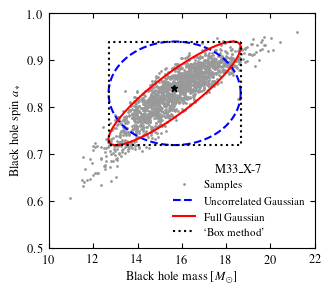

In [68]:
# M33_X-7
m33x7_data = np.genfromtxt("data/raw/solar/M33_X-7/f3_data_tex.txt")
m33x7_a0 = 0.77 + 0.068
a0 = m33x7_data[:,0]
m0 = m33x7_data[:,1]
m33x7_a = -0.2 + (a0-154.560)*(0.1+0.2)/(369.920-154.560) + m33x7_a0
m33x7_m = 12 + (m0-665.600)*(20-12)/(880.960-665.600)
m33x7_data = np.array([m33x7_m, m33x7_a]).T

plot_m_a(m33x7_m, m33x7_a, label='M33_X-7', bfit=[15.65, 0.84], xlims=[10,22], ylims=[0.5, 1])

m33x7_m_mean, m33x7_a_mean = np.mean(m33x7_m), np.mean(m33x7_a)
m33x7_m_std, m33x7_a_std = np.std(m33x7_m), np.std(m33x7_a)
cov = np.cov((m33x7_m,m33x7_a))
l, c = np.linalg.eig(cov)
phi = np.linspace(0, 2*np.pi, 50)
m33x7_xp = np.array([2*c@np.diag(np.sqrt(l))@v for x in phi for v in [np.array([np.cos(x), np.sin(x)]).T]])

# For the example plot
mu0 = 1.4e-13 # eV
m_bh_vals = np.arange(10, 25, 0.1) # Msol

# def GammaSR_nlm_bxzh(mu: float, mbh: float, astar: float, n: int = 2, l: int = 1, m: int = 1) -> float:

def compute_regge_slopes_bxzh(mu: float, mbh_vals: list[float], inv_tSR: float = inv_tSR) -> np.ndarray:
    a_min_vals = []
    foo = lambda a, mbh: GammaSR_nlm_bxzh(mu, mbh, a, 2, 1, 1) - inv_tSR
    for mbh in mbh_vals:
        with warnings.catch_warnings(record=True) as _:
            try:
                res = root_scalar(foo, bracket=[0.001, 0.999], args=(mbh))
                a_root = res.root
            except ValueError:
                a_root = 1
        a_min_vals.append(a_root)
    return np.array(a_min_vals)

# Compute Regge slopes for our SR rate approx and many states
a_vals_regge = compute_regge_slopes_bxzh(mu0, m_bh_vals, 10*inv_eVyr/tSR_in_yr)

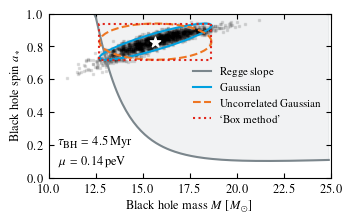

In [69]:
fig, ax = plt.subplots(figsize=(mnras_width,mnras_width/golden_ratio))

ax.fill_between(m_bh_vals, a_vals_regge, a_vals_regge+1, color=Jubilee, alpha=0.1)
ax.scatter(m33x7_m, m33x7_a, s=1, marker='s', c='k', alpha=0.1, rasterized=True)#, label=r"BH samples")
ax.scatter(m33x7_m_mean, m33x7_a_mean, s=60, fc='w', ec='w', marker='*')
ax.plot(m_bh_vals, a_vals_regge, c=Jubilee, label=r"Regge slope")
ax.plot(m33x7_m_mean + m33x7_xp[:,0], m33x7_a_mean + m33x7_xp[:,1], c=Victoria, ls='-', label=r"Gaussian")
ax.plot(m33x7_m_mean + 2*m33x7_m_std*np.cos(phi), m33x7_a_mean + 2*m33x7_a_std*np.sin(phi), c=Overground, ls='--', label=r"Uncorrelated Gaussian")
ax.plot(m33x7_m_mean + 2*m33x7_m_std*np.array([1,1,-1,-1,1]), m33x7_a_mean + 2*m33x7_a_std*np.array([1,-1,-1,1,1]), c=Central, ls=':', label=r"`Box method'")
ax.text(10.5, 0.08, r"$\mu = \SI{0.14}{\pico\eV}$")
ax.text(10.5, 0.2, r"$\tau_\text{BH} = \num{4.5}\,\text{Myr}$")

ax.set_ylim([0,1])
ax.set_xlim([10,25])
ax.set_xlabel(r"Black hole mass $M$ [$M_\odot$]")
ax.set_ylabel(r"Black hole spin $a_\ast$")
ax.legend(frameon=False, handlelength=1.6)

fig.tight_layout(pad=0.25)
fig.savefig("figures/distr_M33_X-7.pdf", backend='pgf')
plt.show()

mean = 0.9324 vs median = 0.9354
m = 8.03 +/- -0.26, a = 0.933 +/- 0.02


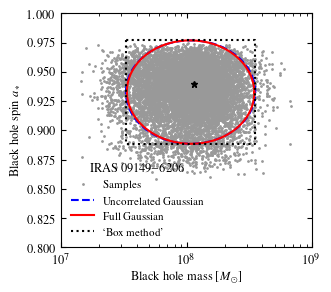

[0.93414209 0.02358073] vs 0.932684491175694 0.02206999034539964


In [71]:
# IRAS 09149−6206
# M/1e8 = 1.15 +1.80/-0.84 (https://arxiv.org/pdf/2009.08463.pdf, Keplerian)
# a = 0.94 +0.02/-0.07 (https://arxiv.org/pdf/2009.10734.pdf)

# MLE for truncated Gaussians
# See http://hdl.lib.byu.edu/1877/etd3412 MSc thesis
# M. Halperin, Maximum likelihood estimation in truncated samples, Ann. Math. Stat., 23 (1952), 226–238. https://www.jstor.org/stable/2236448
# Also  Ann. Math. Statist. 21(4): 557-569 (December, 1950). DOI: 10.1214/aoms/1177729751  ?!
# A. C. Cohen, Simplified estimators for the normal distribution when samples are singly censored or truncated, Technometrics, 1 (1959), 217–237. http://dx.doi.org/10.1080/00401706.1959.10489859
# A. C. Cohen, Tables for maximum likelihood estimates: Singly truncated and singly censored samples, Technometrics, 3 (1961), 535–541. http://dx.doi.org/10.1080/00401706.1961.10489973

n0 = 10000
m_data = np.genfromtxt("data/raw/smbh/IRAS_09149/post_mbh_keplerian.txt")
m_data, cdf = cdf_1d(m_data)
icdf_iras09149_lgm = PchipInterpolator(cdf, m_data, extrapolate=True)
# icdf_iras09149_m = lambda u: 10**icdf_iras09149_lgm(u)
rv = rng.random(size=n0)
iras09149_lgm = icdf_iras09149_lgm(rv)
iras09149_m = pow(10, iras09149_lgm)

a_data = np.genfromtxt("data/raw/smbh/IRAS_09149/chains_iras09149_mcmc_long_spin.txt")
print("mean = {:.4f} vs median = {:.4f}".format(np.mean(a_data), np.median(a_data)))
a_data, cdf = cdf_1d(a_data)
icdf_iras09149_a = PchipInterpolator(cdf, a_data, extrapolate=True)
rv = rng.random(size=n0)
iras09149_a = icdf_iras09149_a(rv)

plot_m_a(iras09149_lgm, iras09149_a, label='IRAS 09149−6206', bfit=[1.15e8, 0.94], xlims=[1e7, 1e9], ylims=[0.8, 1], lgm=True)

iras09149_lgm_mean, iras09149_a_mean = np.mean(iras09149_lgm), np.mean(iras09149_a)
iras09149_m_mean = pow(10, iras09149_lgm_mean)
iras09149_lgm_std, iras09149_a_std = np.std(iras09149_lgm), np.std(iras09149_a)
cov = np.cov((iras09149_lgm,iras09149_a))
l, c = np.linalg.eig(cov)
phi = np.linspace(0, 2*np.pi, 50)
iras09149_xp = np.array([2*c@np.diag(np.sqrt(l))@v for x in phi for v in [np.array([np.cos(x), np.sin(x)]).T]])

# Recall that a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
# a = -loc/scale, b = (0.98-loc)/scale
llike = lambda x, samples: 2*len(samples)*np.log(0.5*(erf((0.98-x[0])/(np.sqrt(2)*x[1])) + erf(x[0]/(np.sqrt(2)*x[1])))) + len(samples)*np.log(2*np.pi*x[1]*x[1]) + np.sum(pow(samples-x[0],2))/(x[1]*x[1])
res = minimize(llike, x0=[iras09149_a_mean,iras09149_a_std], bounds=[(0.8,0.98),(1e-4, 0.1)], args=(iras09149_a,))
print(res.x, "vs", iras09149_a_mean, iras09149_a_std)

# For the example plot
mu0 = 2.5e-19 # eV
m_bh_vals = np.logspace(7, 9, 100) # Msol
iras09149_a_vals_regge = compute_regge_slopes_bxzh(mu0, m_bh_vals, 10*inv_eVyr/tSR_in_yr)

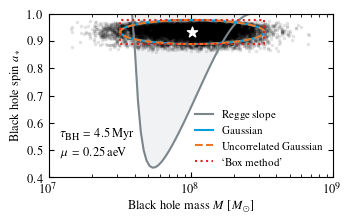

In [76]:
fig, ax = plt.subplots(figsize=(mnras_width,mnras_width/golden_ratio))

ax.fill_between(m_bh_vals, iras09149_a_vals_regge, iras09149_a_vals_regge+1, color=Jubilee, alpha=0.1)
ax.scatter(iras09149_m, iras09149_a, s=1, marker='s', c='k', alpha=0.075, rasterized=True)#, label=r"BH samples")
ax.scatter(iras09149_m_mean, iras09149_a_mean, s=60, fc='w', ec='w', marker='*')
ax.plot(m_bh_vals, iras09149_a_vals_regge, c=Jubilee, label=r"Regge slope")

ax.plot(pow(10, iras09149_lgm_mean + iras09149_xp[:,0]), iras09149_a_mean + iras09149_xp[:,1], c=Victoria, ls='-', label=r"Gaussian")
ax.plot(pow(10, iras09149_lgm_mean + 2*iras09149_lgm_std*np.cos(phi)), iras09149_a_mean + 2*iras09149_a_std*np.sin(phi), c=Overground, ls='--', label=r"Uncorrelated Gaussian")
ax.plot(pow(10, iras09149_lgm_mean + 2*iras09149_lgm_std*np.array([1,1,-1,-1,1])), iras09149_a_mean + 2*iras09149_a_std*np.array([1,-1,-1,1,1]), c=Central, ls=':', label=r"`Box method'")
ax.text(1.2e7, 0.48, r"$\mu = \SI{0.25}{\atto\eV}$")
ax.text(1.2e7, 0.55, r"$\tau_\text{BH} = \num{4.5}\,\text{Myr}$")

ax.set_ylim([0.4,1])
ax.set_xlim([1e7, 1e9])
ax.set_xscale('log')
ax.set_xlabel(r"Black hole mass $M$ [$M_\odot$]")
ax.set_ylabel(r"Black hole spin $a_\ast$")
ax.legend(frameon=False, handlelength=1.6)

fig.tight_layout(pad=0.25)
fig.savefig("figures/distr_IRAS09149_6206.pdf", backend='pgf')
plt.show()

## Constraints

In [164]:
# Compute constraints w/o self-interactions for M33 X-7
bh_indices_matt = { 'Cygnus X-1': 2, 'Cyg X-1': 2, 'GRO J1655-40': 3, 'GRS1915+105': 4, 'M33 X-7': 13, 'LMC X-1': 11, 'IRAS 09149-6206': 24 }
masha_data = [
   ['M33 X-7', 3e6, 15.56, 1.45, 0.84, 0.1, 0.1],
   ['LMC X-1', 5e6, 10.91, 1.4, 0.92, 0.06, 0.18],
   ['GRO J1655-40', 3.4e8, 6.3, 0.5, 0.72, 0.16, 0.24],
   ['Cyg X-1', 4.8e6, 14.8, 1.0, 1.0, 0.0, 0.005],
   ['GRS1915+105', 4e9, 10.1, 0.6, 1.0, 0.0, 0.025],
   ['IRAS 09149-6206', 1e14, 1.07152e8, 4.82676e7, 0.933, 0.02, 0.02]
]
states0 = [(ell+1, ell, ell) for ell in range(1,7)]
npoints0 = 101
muvals = np.logspace(-14, -10, npoints0)
m33x7_tbh = min(masha_data[0][1], tSalpeter_in_yr)
print(f"tEdd/10 = {0.1*tEddington_in_yr:.2e} yr, tSapl/10 = {0.1*tSalpeter_in_yr:.2e} yr, tSMBH = {masha_data[0][1]:.2e} yr")

def get_excl_prob_matt(mu, bh_name):
   try:
      lgmu, lginvf = np.log10(mu), 18
      return stellar_functions[bh_indices_matt[bh_name]](lgmu, lginvf)[0]
   except:
      return np.nan

v1 = np.random.normal(loc=masha_data[0][2], scale=masha_data[0][3], size=n0)
v2 = np.random.normal(loc=masha_data[0][4], scale=masha_data[0][5], size=n0)
mock_data = np.column_stack((v1,v2))

p_m33x7_ours_211 = np.array([p_mc_int_no_f(mu, m33x7_data, states0[:1], tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals)])
p_m33x7_ours_nlm = np.array([p_mc_int_no_f(mu, m33x7_data, states0, tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in muvals])
pex_m33x7_matt = np.array([get_excl_prob_matt(mu, 'M33 X-7') for mu in tqdm(muvals)])
pex_m33x7_uncorr = np.array([p_mc_int_no_f(mu, mock_data, states0[:1], tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals)])
p_m33x7_masha = np.array([is_box_allowed_bosenova(mu, 1e-18, masha_data[0], states=[(2,1,1)]) for mu in tqdm(muvals)])

tEdd/10 = 4.00e+07 yr, tSapl/10 = 4.50e+06 yr, tSMBH = 3.00e+06 yr


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

/var/folders/7r/yf1l13xd5_7_hfd1dr2jvyfc0000gn/T/ipykernel_39344/1970567447.py:20: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  return stellar_functions[bh_indices_matt[bh_name]](lgmu, lginvf)[0]


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [125]:
# Compute constraints with bosenova for M33 X-7
lgmuvals = np.log10(muvals)
fvals = np.logspace(11, 19, npoints0)
invfvals = 1/fvals
lginvfvals = np.log10(invfvals)
# zvals = np.array([mc_integration_bosenova_old(mu, invf, m33x7_data, 2, 1, 1, tbh=masha_data[0][1], sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals) for invf in invfvals])
zvals = np.array([mc_integration_bosenova(mu, invf, m33x7_data, [(2,1,1)], tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals) for invf in invfvals])
# np.savetxt("marginal_post_m33x7_bose_bxzh.dat", zvals)

# Plot the results
npoints1 = 300
x0 = np.linspace(lgmuvals.min(), lgmuvals.max(), npoints1)
y0 = np.linspace(lginvfvals.min(), lginvfvals.max(), npoints1)
z0 = griddata(([lgmu for lgmu in lgmuvals for _ in lginvfvals], [lgif for _ in lgmuvals for lgif in lginvfvals]), zvals, (x0[None,:], y0[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

In [126]:
# Compute constraints with bosenova and many states for M33 X-7

zvals = np.array([mc_integration_bosenova(mu, invf, m33x7_data, states0, tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals) for invf in invfvals])
z1 = griddata(([lgmu for lgmu in lgmuvals for _ in lginvfvals], [lgif for _ in lgmuvals for lgif in lginvfvals]), zvals, (x0[None,:], y0[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

In [127]:
# Compute constraints with eq for M33 X-7

zvals = np.array([p_mc_int_eq(mu, invf, m33x7_data, tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals) for invf in invfvals])
z2 = griddata(([lgmu for lgmu in lgmuvals for _ in lginvfvals], [lgif for _ in lgmuvals for lgif in lginvfvals]), zvals, (x0[None,:], y0[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

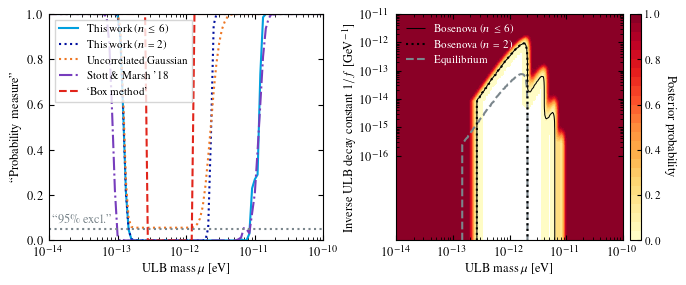

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(2*mnras_width, mnras_width/1.25))

ax = axes[0]
#set_axis_formatter(ax, axxrange=range(-14,-9))

ax.plot(muvals, p_m33x7_ours_nlm, c=Victoria, ls='-', label=r"This work ($n \leq 6$)")
ax.plot(muvals, p_m33x7_ours_211, c=Picadilly, ls=':', label=r"This work ($n = 2$)")
ax.plot(muvals, pex_m33x7_uncorr, c=Overground, ls=':', label=r"Uncorrelated Gaussian")
ax.plot(muvals, 1 - pex_m33x7_matt, c=Elizabeth, ls='-.', label=r"Stott \& Marsh '18")
ax.plot(muvals, 1 - p_m33x7_masha, c=Central, ls='--', label=r"`Box method'")
ax.plot([1e-14, 1e-9], 2*[0.05], c=Jubilee, ls=':') #, label=r"``95% excl.\ level''")
ax.text(1.1e-14, 0.075, r"``95\% excl.''", c=Jubilee, fontsize=9, ha='left')

ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"``Probability measure''")
ax.set_xscale('log')
ax.set_xlim([1e-14, 1e-10])
ax.set_ylim([0, 1])
# ax.legend(loc='center', bbox_to_anchor=(0.51,0.75))
ax.legend(frameon=True, loc=2, ncols=1, handlelength=1.7)

ax = axes[1]
set_axis_formatter(ax, axxrange=range(-14,-9), axyrange=range(-16,-10))

plt.contourf(x0, y0, z1, cmap='YlOrRd', levels=25, zorder=-10)
cs = plt.colorbar(ticks=[0.2*i for i in range(6)], pad=0.025)
cs.ax.set_ylabel('Posterior probability', labelpad=12, rotation=270)
cs.ax.tick_params(labelsize=8, length=3, pad=3)
cs.ax.set_ylim(0,1)
cntr1 = ax.contour(x0, y0, z1, levels=[0.05], colors=[Northern], linestyles=['-'], linewidths=[0.75], zorder=2)
cntr3 = ax.contour(x0, y0, z2, levels=[0.05], colors=[Jubilee], linestyles=['--'], linewidths=[1.5], zorder=2.1)
cntr2 = ax.contour(x0, y0, z0, levels=[0.05], colors=[Northern], linestyles=[':'], zorder=2.2)
hndl1, _ = cntr1.legend_elements()
hndl2, _ = cntr2.legend_elements()
hndl3, _ = cntr3.legend_elements()
leg = ax.legend(hndl1+hndl2+hndl3, [r"Bosenova ($n \leq 6$)", r"Bosenova ($n = 2$)", r"Equilibrium"], frameon=False, loc=2, ncols=1, handlelength=1.7) # columnspacing=0.5, 
for t in leg.get_texts():
   t.set_color('w')

ax.set_rasterization_zorder(-1)
ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"Inverse ULB decay constant $1/f$ [$\text{GeV}^{-1}$]")
ax.set_xlim([x0.min(), x0.max()])
ax.set_ylim([y0.min(), y0.max()])

fig.tight_layout(pad=0.2)
fig.savefig("figures/exclusions_M33_X-7.pdf", backend='pgf')
plt.show()

In [129]:
# Now new limits for IRAS 09149−6206
indx_max_iras09149 = 3000

muvals1 = np.logspace(-20, -17, npoints0)
lgmuvals1 = np.log10(muvals1)
fvals1 = np.logspace(11, 19, npoints0)
invfvals1 = 1/fvals1
lginvfvals1 = np.log10(invfvals1)

iras09149_data = np.array([iras09149_m, iras09149_a]).T
iras09149_tinfall = t_infall(1e-19, pow(10, 8.03))
print("Infall time for IRAS 09149-6206 = {:.2e} yr".format(iras09149_tinfall))
# iras09149_tbh = 0.1*tEddington_in_yr
iras09149_tbh = tHubble_in_yr
# iras09149_tbh = iras09149_tinfall

Infall time for IRAS 09149-6206 = 1.66e-01 yr


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

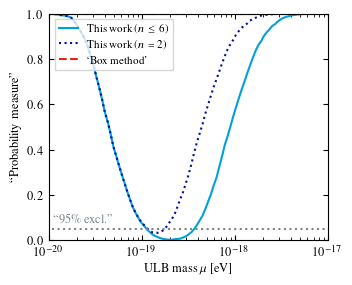

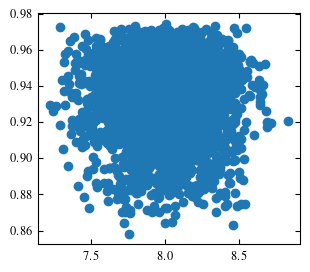

In [130]:
p_iras09149_ours_211 = np.array([p_mc_int_no_f(mu, iras09149_data[:indx_max_iras09149], states0[:1], tbh=iras09149_tbh, sr_function=GammaSR_nlm_superrad) for mu in tqdm(muvals1)])
p_iras09149_ours_nlm = np.array([p_mc_int_no_f(mu, iras09149_data[:indx_max_iras09149], states0, tbh=iras09149_tbh, sr_function=GammaSR_nlm_superrad) for mu in tqdm(muvals1)])
p_iras09149_masha = np.array([is_box_allowed_bosenova(mu, 1e-20, masha_data[-1], states=[(2,1,1)]) for mu in tqdm(muvals1)])

fig, ax = plt.subplots(figsize=(mnras_width, mnras_width/1.25))

#set_axis_formatter(ax, axxrange=range(-14,-9))

ax.plot(muvals1, p_iras09149_ours_nlm, c=Victoria, ls='-', label=r"This work ($n \leq 6$)")
ax.plot(muvals1, p_iras09149_ours_211, c=Picadilly, ls=':', label=r"This work ($n = 2$)")
ax.plot(muvals1, 1 - p_iras09149_masha, c=Central, ls='--', label=r"`Box method'")
ax.plot(muvals1[[1,-1]], 2*[0.05], c=Jubilee, ls=':') #, label=r"``95% excl.\ level''")
ax.text(1.1e-20, 0.075, r"``95\% excl.''", c=Jubilee, fontsize=9, ha='left')

ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"``Probability measure''")
ax.set_xscale('log')
ax.set_xlim(muvals1[[0,-1]])
ax.set_ylim([0, 1])
# ax.legend(loc='center', bbox_to_anchor=(0.51,0.75))
ax.legend(frameon=True, loc=2, ncols=1, handlelength=1.7)

fig.tight_layout(pad=0.2)
#fig.savefig("figures/exclusions_IRAS_09149_1D.pdf", backend='pgf')
plt.show()

plt.scatter(np.log10(iras09149_data[:indx_max_iras09149,0]), iras09149_data[:indx_max_iras09149,1])
plt.show()

In [131]:
m33x7_tbh/1e6

3.0

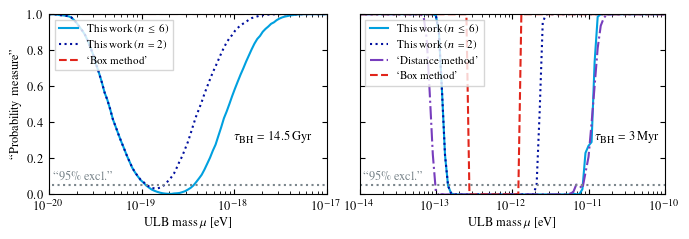

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(2*mnras_width, mnras_width/1.5), width_ratios=[1,1.1])

ax = axes[0]

ax.plot(muvals1, p_iras09149_ours_nlm, c=Victoria, ls='-', label=r"This work ($n \leq 6$)")
ax.plot(muvals1, p_iras09149_ours_211, c=Picadilly, ls=':', label=r"This work ($n = 2$)")
ax.plot(muvals1, 1 - p_iras09149_masha, c=Central, ls='--', label=r"`Box method'")
ax.plot(muvals1[[1,-1]], 2*[0.05], c=Jubilee, ls=':') #, label=r"``95% excl.\ level''")
ax.text(1.1e-20, 0.075, r"``95\% excl.''", c=Jubilee, fontsize=9, ha='left')
ax.text(1e-18, 0.3, r"$\tau_\text{BH} = \num{14.5}\,\text{Gyr}$")

ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"``Probability measure''")
ax.set_xscale('log')
ax.set_xlim(muvals1[[0,-1]])
ax.set_ylim([0, 1])
# ax.legend(loc='center', bbox_to_anchor=(0.51,0.75))
ax.legend(frameon=True, loc=2, ncols=1, handlelength=1.7)

ax = axes[1]

ax.plot(muvals, p_m33x7_ours_nlm, c=Victoria, ls='-', label=r"This work ($n \leq 6$)")
ax.plot(muvals, p_m33x7_ours_211, c=Picadilly, ls=':', label=r"This work ($n = 2$)")
ax.plot(muvals, 1 - pex_m33x7_matt, c=Elizabeth, ls='-.', label=r"`Distance method'")#, label=r"Stott \& Marsh '18")
ax.plot(muvals, 1 - p_m33x7_masha, c=Central, ls='--', label=r"`Box method'")
ax.plot([1e-14, 1e-9], 2*[0.05], c=Jubilee, ls=':') #, label=r"``95% excl.\ level''")
ax.text(1.1e-14, 0.075, r"``95\% excl.''", c=Jubilee, fontsize=9, ha='left')
ax.text(1.2e-11, 0.3, r"$\tau_\text{BH} = \num{3}\,\text{Myr}$")

ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
#ax.set_ylabel(r"``Probability measure''")
ax.set_yticklabels([])
ax.set_xscale('log')
ax.set_xlim([1e-14, 1e-10])
ax.set_ylim([0, 1])
# ax.legend(loc='center', bbox_to_anchor=(0.51,0.75))
ax.legend(frameon=True, loc=2, ncols=1, handlelength=1.7)

fig.tight_layout(pad=0.25)
fig.savefig("figures/comparison.pdf", backend='pgf')
plt.show()

In [133]:
# Compute constraints with bosenova (n >= 2) for IRAS 09149−6206
zvals = np.array([mc_integration_bosenova(mu, invf, iras09149_data[:indx_max_iras09149], states0, tbh=iras09149_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals1) for invf in invfvals1])
x1 = np.linspace(lgmuvals1.min(), lgmuvals1.max(), npoints1)
y1 = np.linspace(lginvfvals1.min(), lginvfvals1.max(), npoints1)
z3 = griddata(([lgmu for lgmu in lgmuvals1 for _ in lginvfvals1], [lgif for _ in lgmuvals1 for lgif in lginvfvals1]), zvals, (x1[None,:], y1[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

In [134]:
# Compute constraints with bosenova (n = 2) for IRAS 09149−6206
zvals = np.array([mc_integration_bosenova(mu, invf, iras09149_data[:indx_max_iras09149], [(2,1,1)], tbh=iras09149_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals1) for invf in invfvals1])
z4 = griddata(([lgmu for lgmu in lgmuvals1 for _ in lginvfvals1], [lgif for _ in lgmuvals1 for lgif in lginvfvals1]), zvals, (x1[None,:], y1[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

In [135]:
# Compute constraints with eq for IRAS 09149−6206
zvals = np.array([p_mc_int_eq(mu, invf, iras09149_data[:indx_max_iras09149], tbh=iras09149_tbh, sr_function=GammaSR_nlm_bxzh) for mu in tqdm(muvals1) for invf in invfvals1])
z5 = griddata(([lgmu for lgmu in lgmuvals1 for _ in lginvfvals1], [lgif for _ in lgmuvals1 for lgif in lginvfvals1]), zvals, (x1[None,:], y1[:,None]), method='linear')

  0%|          | 0/101 [00:00<?, ?it/s]

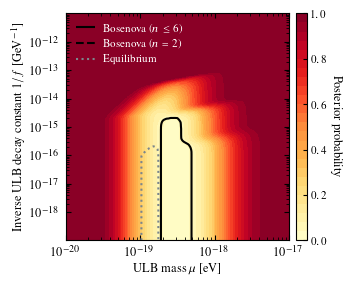

In [136]:
fig, ax = plt.subplots(figsize=(mnras_width, mnras_width/1.25))

set_axis_formatter(ax, axxrange=range(-20,-16), axyrange=range(-18,-11))

plt.contourf(x1, y1, z3, cmap='YlOrRd', levels=25, zorder=-10)
cs = plt.colorbar(ticks=[0.2*i for i in range(6)], pad=0.025)
cs.ax.set_ylabel('Posterior probability', labelpad=12, rotation=270)
cs.ax.tick_params(labelsize=8, length=3, pad=3)
cs.ax.set_ylim(0,1)
cntr1 = ax.contour(x1, y1, z3, levels=[0.05], colors=[Northern], linestyles=['-'], zorder=2)
cntr2 = ax.contour(x1, y1, z4, levels=[0.05], colors=[Northern], linestyles=['--'], zorder=2.2)
cntr3 = ax.contour(x1, y1, z5, levels=[0.05], colors=[Jubilee], linestyles=[':'], linewidths=[1.5], zorder=2.1)
hndl1, _ = cntr1.legend_elements()
hndl2, _ = cntr2.legend_elements()
hndl3, _ = cntr3.legend_elements()
leg = ax.legend(hndl1+hndl2+hndl3, [r"Bosenova ($n \leq 6$)", r"Bosenova ($n = 2$)", r"Equilibrium"], frameon=False, loc=2, handlelength=1.7)
for t in leg.get_texts():
   t.set_color('w')

ax.set_rasterization_zorder(-1)
ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"Inverse ULB decay constant $1/f$ [$\text{GeV}^{-1}$]")
ax.set_xlim([x1.min(), x1.max()])
ax.set_ylim([y1.min(), y1.max()])

fig.tight_layout(pad=0.2)
fig.savefig("figures/exclusions_IRAS_09149.pdf", backend='pgf')
plt.show()

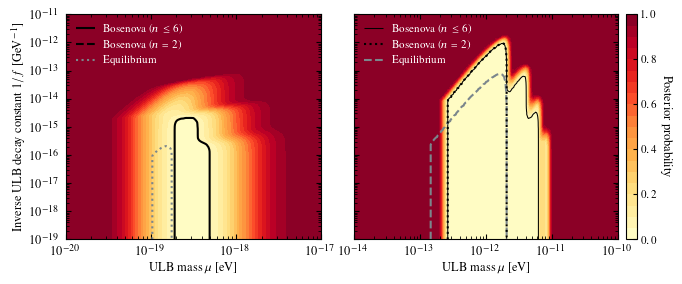

In [152]:
cmap = 'YlOrRd'
fig, axes = plt.subplots(1, 2, figsize=(2*mnras_width, mnras_width/1.25), width_ratios=[1,1.25])

ax = axes[0]

set_axis_formatter(ax, axxrange=range(-20,-16), axyrange=range(-19,-10))

ax.contourf(x1, y1, np.maximum(z3,0), cmap='YlOrRd', levels=20, zorder=-10)
#cs = plt.colorbar(ticks=[0.2*i for i in range(6)], pad=0.025)
#cs.ax.set_ylabel('Posterior probability', labelpad=12, rotation=270)
#cs.ax.tick_params(labelsize=8, length=3, pad=3)
#cs.ax.set_ylim(0,1)
cntr1 = ax.contour(x1, y1, z3, levels=[0.05], colors=[Northern], linestyles=['-'], zorder=2)
cntr2 = ax.contour(x1, y1, z4, levels=[0.05], colors=[Northern], linestyles=['--'], zorder=2.2)
cntr3 = ax.contour(x1, y1, z5, levels=[0.05], colors=[Jubilee], linestyles=[':'], linewidths=[1.5], zorder=2.1)
hndl1, _ = cntr1.legend_elements()
hndl2, _ = cntr2.legend_elements()
hndl3, _ = cntr3.legend_elements()
leg = ax.legend(hndl1+hndl2+hndl3, [r"Bosenova ($n \leq 6$)", r"Bosenova ($n = 2$)", r"Equilibrium"], frameon=False, loc=2, handlelength=1.7)
for t in leg.get_texts():
   t.set_color('w')

ax.set_rasterization_zorder(-1)
ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
ax.set_ylabel(r"Inverse ULB decay constant $1/f$ [$\text{GeV}^{-1}$]")
ax.set_xlim([x1.min(), x1.max()])
ax.set_ylim([y1.min(), y1.max()])


ax = axes[1]

set_axis_formatter(ax, axxrange=range(-14,-9), axyrange=range(-19,-10))

plt.contourf(x0, y0, np.maximum(z1,0), cmap=cmap, levels=20, zorder=-10)
cs = plt.colorbar(ticks=[0.2*i for i in range(6)], pad=0.025)
cs.ax.set_ylabel('Posterior probability', labelpad=12, rotation=270)
cs.ax.tick_params(labelsize=8, length=3, pad=3)
cs.ax.set_ylim(0,1)
cntr1 = ax.contour(x0, y0, z1, levels=[0.05], colors=[Northern], linestyles=['-'], linewidths=[0.75], zorder=2)
cntr3 = ax.contour(x0, y0, z2, levels=[0.05], colors=[Jubilee], linestyles=['--'], linewidths=[1.5], zorder=2.1)
cntr2 = ax.contour(x0, y0, z0, levels=[0.05], colors=[Northern], linestyles=[':'], zorder=2.2)
hndl1, _ = cntr1.legend_elements()
hndl2, _ = cntr2.legend_elements()
hndl3, _ = cntr3.legend_elements()
leg = ax.legend(hndl1+hndl2+hndl3, [r"Bosenova ($n \leq 6$)", r"Bosenova ($n = 2$)", r"Equilibrium"], frameon=False, loc=2, ncols=1, handlelength=1.7) # columnspacing=0.5, 
for t in leg.get_texts():
   t.set_color('w')

ax.set_rasterization_zorder(-1)
ax.set_xlabel(r"ULB mass $\mu$ [$\text{eV}$]")
# ax.set_ylabel(r"Inverse ULB decay constant $1/f$ [$\text{GeV}^{-1}$]")
ax.set_yticklabels([])
ax.set_xlim([x0.min(), x0.max()])
ax.set_ylim([y0.min(), y0.max()])

fig.tight_layout(pad=0.25)
fig.savefig("figures/exclusions.pdf", backend='pgf')
plt.show()

In [91]:
# Some aux numbers

# G_N M_sol^2 
GNetwon_in_eV*Msol_in_eV*Msol_in_eV

8.43135918957397e+75

In [173]:
# Do some tests with emcee
import emcee
import time

def log_prob(x):
   if (-14 < x[0] < -10) and (-19 < x[1] < -11):
      theta = pow(10, x)
      p = mc_integration_bosenova(theta[0], theta[1], m33x7_data, states0, tbh=m33x7_tbh, sr_function=GammaSR_nlm_bxzh)
      if p > 0:
         return np.log(p)
      else:
         return -np.inf
   else:
      return -np.inf

ndim = 2

nwalkers = 32
v0 = np.random.uniform(-14, -10, nwalkers)
v1 = np.random.uniform(-19, -10, nwalkers)
v = np.column_stack((v0, v1))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

t0 = time.time()
state = sampler.run_mcmc(v, 100)
sampler.reset()
t1 = time.time()
print(f"Burn-in time: {(t1-t0)/60.0:.2f} min")
sampler.run_mcmc(state, 2000)
samples = sampler.get_chain(flat=True)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


Burn-in time: 1.21 min


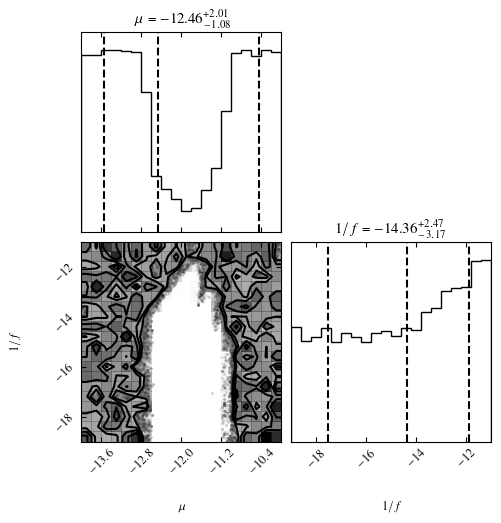

In [174]:
import corner

labels = [r"$\mu$", r"$1/f$"]
q = [0.16, 0.5, 0.84]
figure = corner.corner(samples, labels=labels, quantiles=q, show_titles=True)

In [ ]:
def log_prob(x):
   if (-20 < x[0] < -17) and (-19 < x[1] < -11):
      theta = pow(10, x)
      p = mc_integration_bosenova(theta[0], theta[1], iras09149_data[:indx_max_iras09149], states0, tbh=iras09149_tbh, sr_function=GammaSR_nlm_bxzh)
      if p > 0:
         return np.log(p)
      else:
         return -np.inf
   else:
      return -np.inf

ndim = 2

nwalkers = 32
v0 = np.random.uniform(-20, -17, nwalkers)
v1 = np.random.uniform(-19, -10, nwalkers)
v = np.column_stack((v0, v1))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

t0 = time.time()
state = sampler.run_mcmc(v, 100)
sampler.reset()
t1 = time.time()
print(f"Burn-in time: {(t1-t0)/60.0:.2f} min")
sampler.run_mcmc(state, 2000)
samples = sampler.get_chain(flat=True)

In [ ]:
figure = corner.corner(samples, labels=labels, quantiles=q, show_titles=True)